<a href="https://colab.research.google.com/github/Siddharth-Saravanan/Student_Depression_Analysis_and_Prediction_using_Machine_Learning/blob/main/student_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Depression Prediction Using Machine Learning**
---

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## **Data Loading and Cleaning**

In [2]:
# Loading Data
depr_df = pd.read_csv('student_depression_dataset.csv')
depr_df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Dimensions of Data
depr_df.shape

(27901, 18)

In [4]:
# Overall Info about the dataset
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# Checking for extreme cases of null values
depr_df.apply(lambda x: x.isin(['', 'NA', 'null', 'None'])).sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

### Categorical Values Check

In [6]:
depr_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
depr_df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Notice the anomalies in `City` column such as **`M.Tech, Saanvi, 3.0, Less than 5 Kalyan`** and so much more... <br>

These are needed to be cleaned

In [8]:
depr_df['City'].value_counts()

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

These anomalous values occur with very low frequency and are likely the result of incorrect or inconsistent data entry. Given their minimal representation, removing them manually has negligible impact on the overall dataset quality and ensures more consistent downstream analysis.

In [9]:
# List of invalid city values (including the typo 'Khaziabad')
invalid_cities = [
    'Saanvi', 'Bhavna', 'City', 'Harsha', "'Less Delhi'", 'M.Tech', '3.0',
    "'Less than 5 Kalyan'", 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
    'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'
]

depr_df = depr_df[~depr_df['City'].isin(invalid_cities)].copy()

In [10]:
print("Shape after removing invalid city values:", depr_df.shape)

Shape after removing invalid city values: (27875, 18)


In [11]:
depr_df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [12]:
depr_df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In the `Profession` column, we observe that some values include single quotes as part of the string itself, like **`'Civil Engineer'`** or **`'UX/UI Designer'`**. <br>
This is likely due to inconsistent formatting in the original CSV — for example, entries wrapped in single quotes may be preserved as string literals with quotes inside. <br>

When **pandas** reads these values, it preserves those ***inner single quotes***, and wraps the entire string in ***double quotes*** for display in Python. This leads to visual and categorical inconsistency, which should be cleaned before further analysis.

In [13]:
# Replacing single quotes with empty string
depr_df['Profession'] = depr_df['Profession'].str.replace("'", "")

In [14]:
depr_df['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

However, the other professions apart from Student have less frequency which will addressed after reviewing other dependent columns like `Work Pressure` and `Job Satisfaction`

In [15]:
depr_df['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [16]:
depr_df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

`Sleep Duration` has inconsistent formatting due to extra quotation marks, similar to the `Profession` column.

In [17]:
# Replacing single quotes with empty string
depr_df['Sleep Duration'] = depr_df['Sleep Duration'].str.replace("'", '')

The `"Others"` category does not represent a valid duration range and needs to be removed to maintain categorical consistency.

In [18]:
# Determining instances of 'Others' in `Sleep Duration` column
(depr_df['Sleep Duration'] == 'Others').sum()

18

In [19]:
# Removing rows with 'Others'
depr_df = depr_df[depr_df['Sleep Duration'] != 'Others'].copy()
depr_df.shape

(27857, 18)

In [20]:
depr_df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours'],
      dtype=object)

In [21]:
depr_df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

Similarly, `Dietary Habits` column has a category `'Others'` which doesn't fit in as the other 3 categories cover all cases. Due to its unclear meaning and low frequency, it is removed to maintain consistency.

In [22]:
# Determining instances of 'Others' in `Dietary Habits` column
(depr_df['Dietary Habits'] == 'Others').sum()

12

In [23]:
# Removing rows with 'Others'
depr_df = depr_df[depr_df['Dietary Habits'] != 'Others'].copy()
depr_df.shape

(27845, 18)

In [24]:
depr_df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

Here, `Degree` column just has a minor anomaly, which is the presence of additional quotes in value `'Class 12'`

In [25]:
depr_df['Degree'] = depr_df['Degree'].str.replace("'","")
depr_df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [26]:
depr_df['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
depr_df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

The column names of the above 2 columns seems to be longer, so we rename them to a user-friendly version

In [28]:
# Renaming Columns
depr_df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts',
    'Family History of Mental Illness': 'FamilyMentalHistory'
}, inplace=True)

In [29]:
depr_df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'SuicidalThoughts',
       'Work/Study Hours', 'Financial Stress', 'FamilyMentalHistory',
       'Depression'],
      dtype='object')

### Numerical Columns Check

In [30]:
# Summary Statistics
depr_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000
mean,70444.165918,25.820794,3.141533,0.000431,7.655971,2.944011,0.000682,7.158700,0.585527
std,40648.819852,4.906224,1.381731,0.044036,1.470879,1.360917,0.044439,3.707202,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70700.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


First, the `id` column is dropped as it does not provide any relevant information for the analysis

In [31]:
depr_df.drop(columns='id', inplace=True)
depr_df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'SuicidalThoughts',
       'Work/Study Hours', 'Financial Stress', 'FamilyMentalHistory',
       'Depression'],
      dtype='object')

From the summary statistics, both `Work Pressure` and `Job Satisfaction` have near-zero mean and very low standard deviation.
This suggests extreme skewness toward zero, warranting further inspection of their value distribution.

In [32]:
# Check Work Pressure column
(depr_df['Work Pressure'].value_counts(normalize=True) * 100).round(2)

Work Pressure
0.0    99.99
5.0     0.01
2.0     0.00
Name: proportion, dtype: float64

In [33]:
# Check Job Satisfaction column
(depr_df['Job Satisfaction'].value_counts(normalize=True) * 100).round(2)

Job Satisfaction
0.0    99.97
2.0     0.01
4.0     0.01
1.0     0.01
3.0     0.00
Name: proportion, dtype: float64

The `Work Pressure` and `Job Satisfaction` columns show extreme imbalance, with ~99.9% values concentrated at 0.
Such skewed distribution limits their predictive power and may require removal or special handling.

Also, we discussed about `Profession` column having less frequency for other jobs than `Student`, and a possible correlation with these 2 columns. Let us explore

In [34]:
# Selecting Profession, Work Pressure and Job Saisfaction columns and arranging them in descending order by Work Pressure and Job Satisfaction columns
depr_df.loc[:,['Profession','Work Pressure','Job Satisfaction']].sort_values(by=['Work Pressure','Job Satisfaction'],ascending=[False,False]).head(10)

,Profession,Work Pressure,Job Satisfaction
4365,Student,5.0,4.0
25746,Student,5.0,4.0
14855,Student,2.0,1.0
292,Student,0.0,3.0
13909,Student,0.0,2.0
23141,Student,0.0,2.0
26719,Student,0.0,2.0
20913,Student,0.0,1.0
0,Student,0.0,0.0
1,Student,0.0,0.0


Well, looks like only the **Students**, that too only 8 of them have either `Work Pressure` or `Job Satisfaction` !!!

Then what is the scenario for other Professions?

In [35]:
# Excluding student records and selecting Profession, Work Pressure and Job Saisfaction columns
depr_df[~depr_df['Profession'].isin(['Student'])].loc[:,['Profession','Work Pressure','Job Satisfaction']]

,Profession,Work Pressure,Job Satisfaction
113,Civil Engineer,0.0,0.0
422,Architect,0.0,0.0
1845,UX/UI Designer,0.0,0.0
2249,Digital Marketer,0.0,0.0
2440,Content Writer,0.0,0.0
3220,Architect,0.0,0.0
3388,Architect,0.0,0.0
3639,Educational Consultant,0.0,0.0
3841,Teacher,0.0,0.0
5016,Teacher,0.0,0.0


In [36]:
depr_df[~depr_df['Profession'].isin(['Student'])].loc[:,['Profession','Work Pressure','Job Satisfaction']].shape

(31, 3)

Out of 31 records who have another profession, none of them are subject to `Work Pressure` and `Job Satisfaction`.

Hence, we will restrict our analysis to student records only, and drop the `Profession`, `Work Pressure`, and `Job Satisfaction` columns.

In [37]:
# Subsetting only student records and dropping Profession, Work Pressure and Job Satisfaction
depr_df = depr_df[depr_df['Profession'] == 'Student'].copy()
depr_df.drop(columns=['Profession','Work Pressure','Job Satisfaction'], inplace=True)
print("Updated shape:",depr_df.shape)
depr_df.columns

Updated shape: (27814, 14)


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'SuicidalThoughts', 'Work/Study Hours', 'Financial Stress',
       'FamilyMentalHistory', 'Depression'],
      dtype='object')

In [38]:
# Revisit summary statistics
depr_df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Depression
count,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000
mean,25.819623,3.140936,7.655894,2.943733,7.159668,0.585173
std,4.907112,1.381907,1.471007,1.360978,3.706737,0.492701
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.280000,2.000000,4.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,1.000000


<!-- Also, observe that `Financial Stress` column is missing from the summary statistics. <br> -->
Coming back to the summary statistics, notice that `Financial Stress` column is missing.<br>
This is because, it has an `object` datatype, indicating that the values are stored as strings rather than numerical types — even though they represent float values.

In [39]:
# Check datatype of Financial Stress column
depr_df['Financial Stress'].dtype

dtype('O')

In [40]:
# Converting string to float using astype()
try:
  depr_df['Financial Stress'] = depr_df['Financial Stress'].astype(float)
except ValueError as e:
  print(e)

could not convert string to float: '?'


Although `astype()` should have worked for converting strings to floats, it raised an error due to the presence of an invalid entry `'?'`

To confirm this, the unique method was used to inspect all distinct values in the column.

In [41]:
depr_df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [42]:
# Check no. of instances of '?'
depr_df['Financial Stress'].value_counts()

Financial Stress
5.0    6690
4.0    5764
3.0    5210
1.0    5101
2.0    5046
?         3
Name: count, dtype: int64

As only 3 records contained the value of `'?'`, they are removed

In [43]:
# Removing rows with '?'
depr_df = depr_df[depr_df['Financial Stress'] != '?'].copy()
depr_df.shape

(27811, 14)

Now the conversion of `Financial Stress` column from `object` to `float` is tried again using `astype()`

In [44]:
# Converting string to float using astype()
try:
  depr_df['Financial Stress'] = depr_df['Financial Stress'].astype(float)
except ValueError as e:
  print(e)

In [45]:
# Check Datatype of Financial Stress column
depr_df['Financial Stress'].dtype

dtype('float64')

In [46]:
# Verify changes in distribution
depr_df['Financial Stress'].value_counts().sort_index()

Financial Stress
1.0    5101
2.0    5046
3.0    5210
4.0    5764
5.0    6690
Name: count, dtype: int64

Now let us check `Study Satisfaction` column. Well, it looks like only 10 students aren't satisfied with studying.<br>
The `Study Satisfaction` column contains 10 rare occurrences of the value `0`, which is inconsistent with the rest of the data that ranges from 1 to 5.

In [47]:
# Check Study Satisfaction column
depr_df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6337
2.0    5822
3.0    5805
1.0    5430
5.0    4407
0.0      10
Name: count, dtype: int64

Similarly, there are only 9 students with no `Academic Pressure` at all <br>
The `Academic Pressure` column includes 9 records with a value of `0`, which deviates from the otherwise consistent 1–5 pattern observed.


In [48]:
# Check Study Satisfaction column
depr_df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7432
5.0    6278
4.0    5139
1.0    4792
2.0    4161
0.0       9
Name: count, dtype: int64

Thus, records containing `0` in either `Study Satisfaction` or `Academic Pressure` are removed to maintain consistency and avoid ambiguity in further analysis.


In [49]:
# Remove rows with 0 in either Study Satisfaction or Academic Pressure
depr_df = depr_df[(depr_df['Study Satisfaction'] != 0) & (depr_df['Academic Pressure'] != 0)].copy()
depr_df.shape

(27799, 14)

#### **Summary**

All ordinal categorical columns such as `Financial Stress`, `Academic Pressure`, and `Study Satisfaction` were checked for anomalies (e.g., invalid 0s or placeholders like '?') and cleaned accordingly.  
Continuous numerical variables including `Age`, `CGPA`, and `Work/Study Hours` would be reviewed in EDA stage for outliers and data integrity.

The variables `Profession`, `Work Pressure`, and `Job Satisfaction` were excluded from the dataset due to high imbalance and near-zero variance, rendering them uninformative for modeling.

Further exploration of continuous variable distributions and outlier detection will be performed in the subsequent EDA section.

### **Exploratory Data Analysis**

### Summary Statistics

In [51]:
# Check summary statistics
depr_df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27799.000000,27799.000000,27799.000000,27799.000000,27799.000000,27799.000000,27799.000000
mean,25.819670,3.141912,7.658133,2.944962,7.160042,3.139969,0.585201
std,4.905925,1.380947,1.466093,1.360087,3.706268,1.437030,0.492696
min,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [52]:
depr_df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyMentalHistory,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Univariate Analysis

In [53]:
depr_df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'SuicidalThoughts', 'Work/Study Hours', 'Financial Stress',
       'FamilyMentalHistory', 'Depression'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x29ee2ab7e90>,
 [Text(-0.19677777050769837, 1.0822562122870998, 'Male'),
  Text(0.19677777050769846, -1.0822562122870998, 'Female')],
 [Text(-0.10733332936783546, 0.5903215703384179, '55.7%'),
  Text(0.1073333293678355, -0.5903215703384179, '44.3%')])

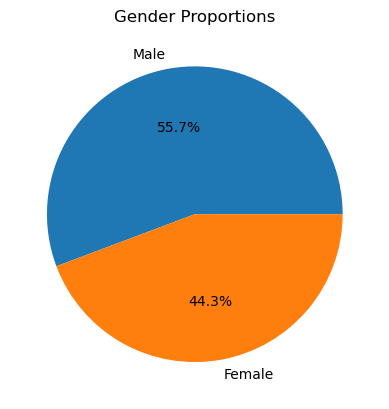

In [ ]:
# Gender

plt.title('Gender Proportions')
plt.pie(depr_df['Gender'].value_counts(), labels=depr_df['Gender'].unique(), autopct='%1.1f%%')

**Males** are slightly higher in number than **Females** with a ratio of approximately **56:44**

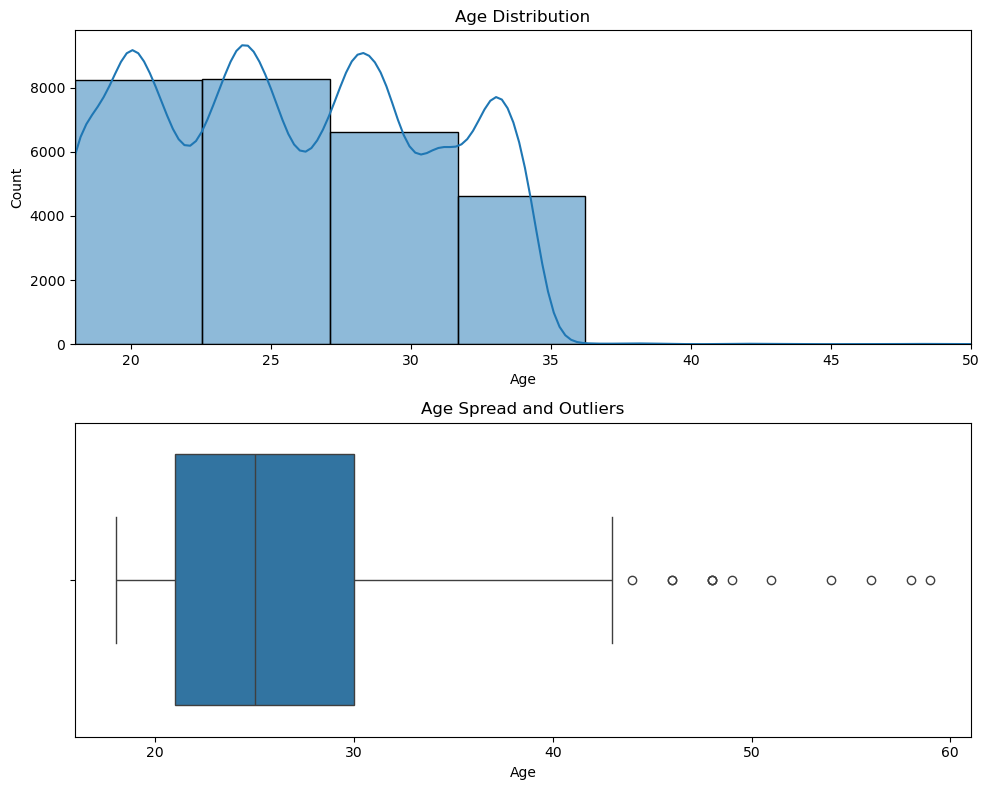

In [57]:
# Age Distribution and Boxplot

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram with KDE
sns.histplot(depr_df['Age'], bins=9, kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")
axs[0].set_xlim(18, 50)

# Boxplot
sns.boxplot(data=depr_df, x='Age', ax=axs[1])
axs[1].set_title("Age Spread and Outliers")

plt.tight_layout()
plt.show()


The majority of students are between **early 20s** and **early 30s**, with a few older students above 40 considered **outliers**. No extreme young ages were observed

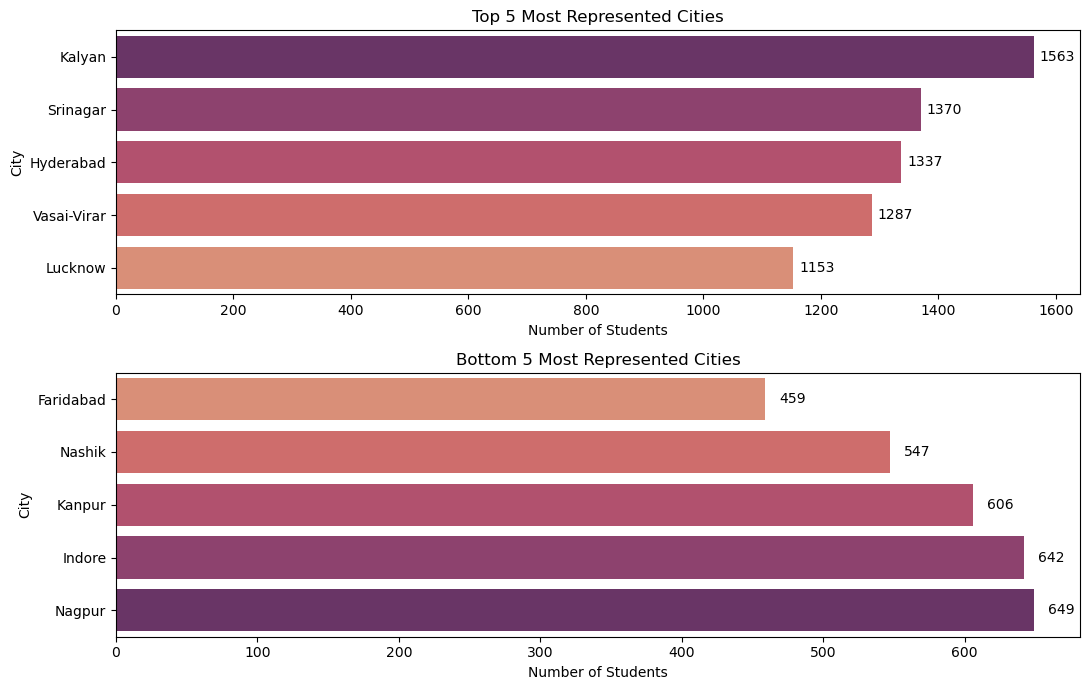

In [ ]:
# Top 5 and Bottom 5 Cities

city_counts = depr_df['City'].value_counts()

top5_cities = city_counts.head(5)
bottom5_cities = city_counts.tail(5).sort_values(ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(11, 7))

sns.barplot(x=top5_cities.values, y=top5_cities.index, ax=ax[0], hue=top5_cities.index, palette="flare_r")
ax[0].set_title("Top 5 Most Represented Cities")
ax[0].set_xlabel("Number of Students")
ax[0].set_ylabel("City")

for i, v in enumerate(top5_cities.values):
    ax[0].text(v + 10, i, str(v), color='black', va='center')

sns.barplot(x=bottom5_cities.values, y=bottom5_cities.index, ax=ax[1], hue=bottom5_cities.index, palette="flare")
ax[1].set_title("Bottom 5 Least Represented Cities")
ax[1].set_xlabel("Number of Students")
ax[1].set_ylabel("City")

for i, v in enumerate(bottom5_cities.values):
    ax[1].text(v + 10, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


**Kalyan** has the highest number of students (**1,563**), followed by **Srinagar** (**1,370**) and **Hyderabad** (**1,337**),  
whereas **Faridabad** (**459**), **Nashik** (**547**), and **Kanpur** (**606**) have the least representation.

Text(0, 0.5, 'Number of Students')

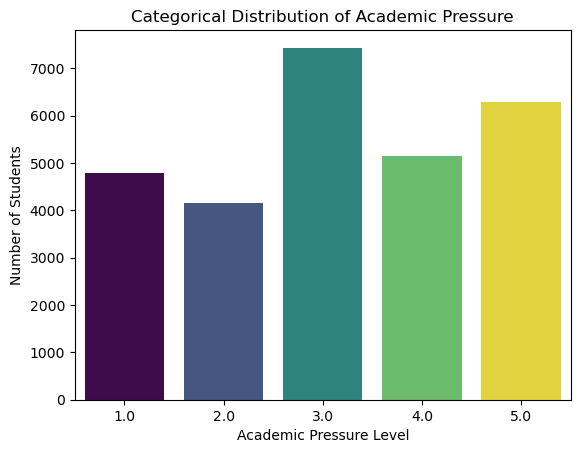

In [80]:
# Academic Pressure Category Distribution

sns.countplot(data=depr_df, x='Academic Pressure', hue='Academic Pressure', palette='viridis', legend=False)
plt.title("Categorical Distribution of Academic Pressure")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")

Majority of students report moderate to high academic pressure (3–5)

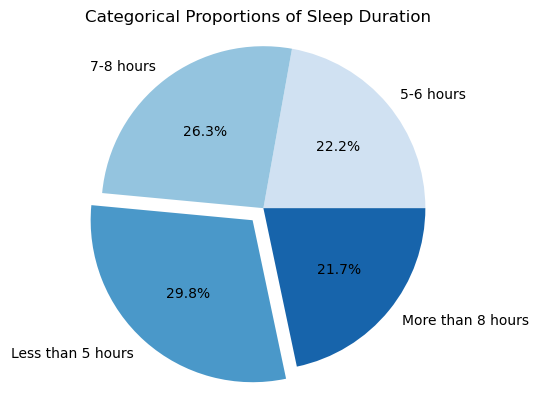

In [78]:
# Sleep Duration Proportions

colors = sns.color_palette("Blues", n_colors=len(depr_df['Sleep Duration'].unique()))

sleep_counts = depr_df['Sleep Duration'].value_counts().sort_index()

explode = [0, 0, 0.1, 0]
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode)
plt.axis('equal')
plt.title("Categorical Proportions of Sleep Duration")
plt.show()


Almost **30%** of the students, sleep `Less than 5 hours`, making it the most common sleep duration among all categories, followed by `7-8 hours` with approximately **26%**

<Axes: xlabel='FamilyMentalHistory', ylabel='count'>

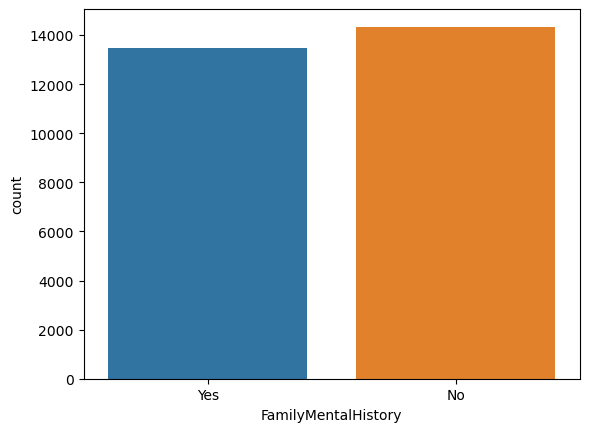

In [107]:
order = ["Yes", "No"]
palette = {"Yes": "#1f77b4", "No": "#ff7f0e"}

sns.countplot(
    data=depr_df,
    x="FamilyMentalHistory",
    order=order,
    hue="FamilyMentalHistory",
    palette=palette,
    legend=False
)

Responses for family mental health history are almost evenly split, with slightly more students reporting no history compared to those who do.

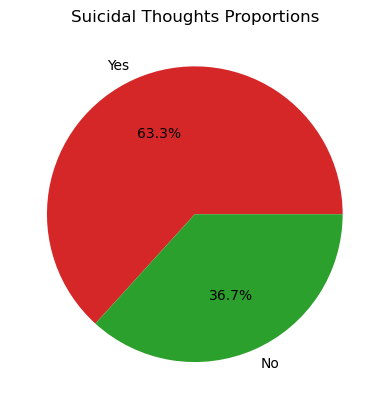

In [117]:
plt.pie(
    depr_df['SuicidalThoughts'].value_counts(),
    labels=depr_df['SuicidalThoughts'].unique(),
    autopct='%1.1f%%',
    colors=["#d62728", "#2ca02c"],
)
plt.title("Suicidal Thoughts Proportions")
plt.show()

Almost **63%** of the students reported having `Suicidal Thoughts`! indicating it is the majority response

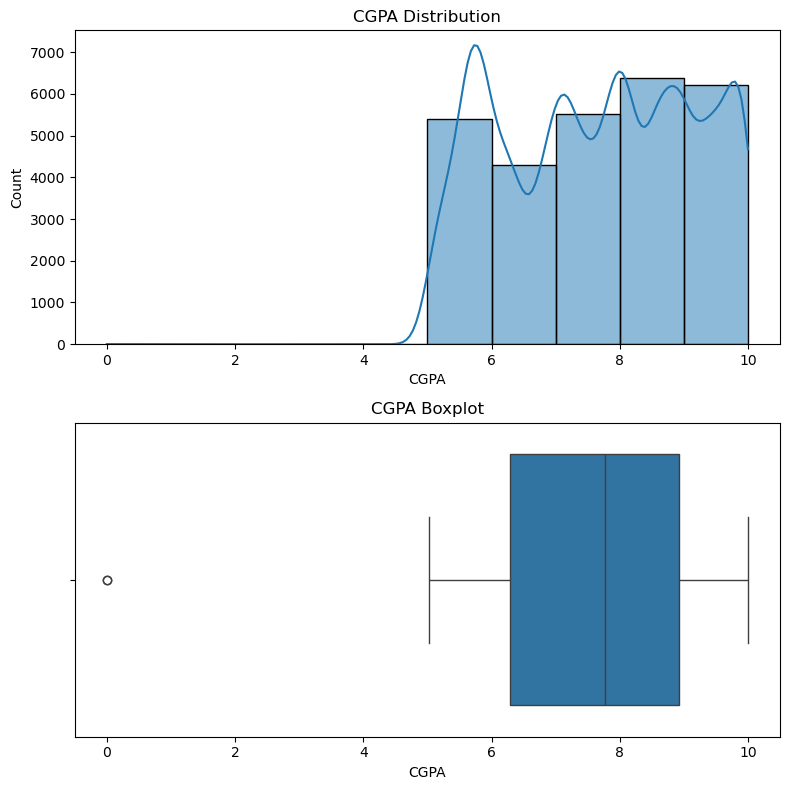

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(data=depr_df, x='CGPA', bins=10, kde=True, ax=axs[0])
axs[0].set_title("CGPA Distribution")

sns.boxplot(data=depr_df, x='CGPA', ax=axs[1])
axs[1].set_title("CGPA Boxplot")

plt.tight_layout()
plt.show()


While the common range of CGPA is from approx 6 to 9, we have an outlier at 0, which is unrealistic for a student.
So we further check the dataframe

In [ ]:
# Checking outliers in CGPA

depr_df[depr_df['CGPA']<2]

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyMentalHistory,Depression
10407,Male,28.0,Vadodara,3.0,0.0,4.0,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
21805,Male,34.0,Pune,1.0,0.0,5.0,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0


Looks like 2 students, either forgot to fill in the CGPA or they really did get 0.0 CGPA! As there are only 2 records, we drop them

In [ ]:
# Removing rows with CGPA equal to 0

depr_df = depr_df[depr_df['CGPA']!=0].copy()
depr_df.shape

(27797, 14)

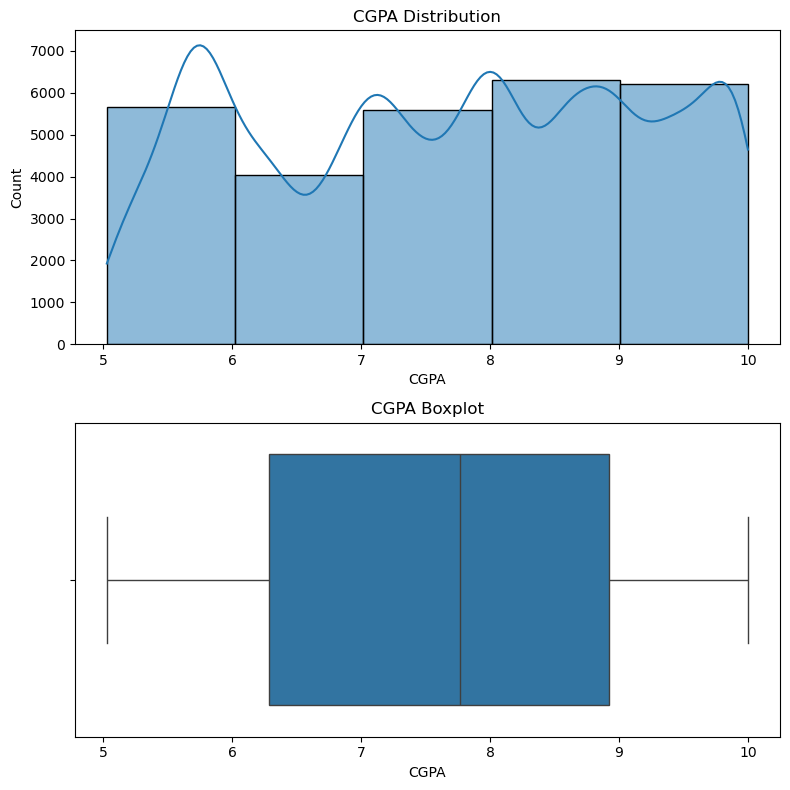

In [123]:
# Re-plotting CGPA Distribution and Boxplot after removing outliers
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(data=depr_df, x='CGPA', bins=5, kde=True, ax=axs[0])
axs[0].set_title("CGPA Distribution")

sns.boxplot(data=depr_df, x='CGPA', ax=axs[1])
axs[1].set_title("CGPA Boxplot")

plt.tight_layout()
plt.show()

Now, we can observe the refined plots after excluding outliers.

Thus the `CGPA` distribution is primarily **between 6 and 9**, with a median around **8**.

Text(0.5, 1.0, 'Categorical Distribution of Work/Study Hours')

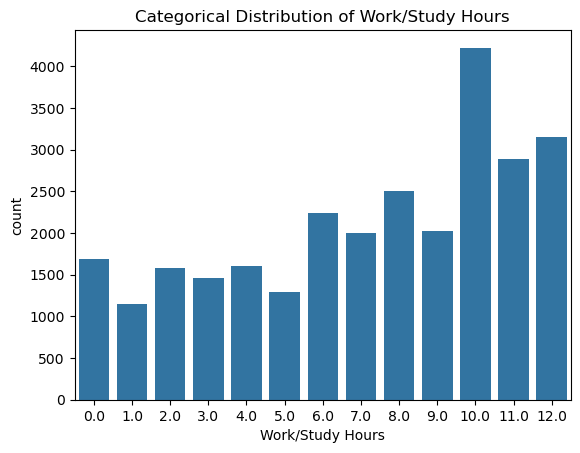

In [ ]:
# Categorical Distribution of Work/Study Hours

sns.countplot(data=depr_df, x='Work/Study Hours')
plt.title("Categorical Distribution of Work/Study Hours")

The distribution of Work/Study Hours spans 13 individual categories, which limits pattern recognition and interpretability.  
Grouping these hours into broader ranges (e.g., **0–4**, **5–8**, **9–12**) would provide clearer and more actionable insights.

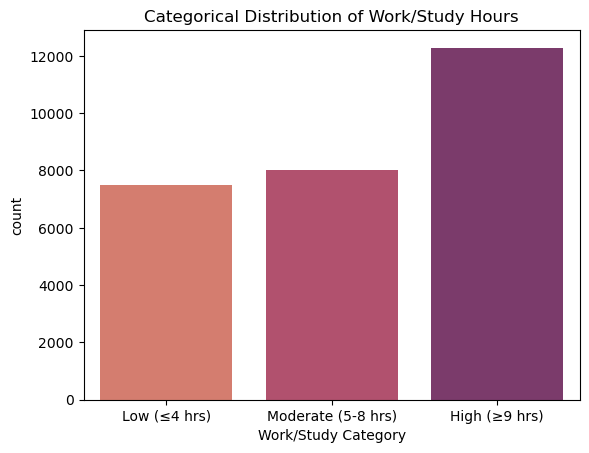

In [149]:
bins = [-1, 4, 8, 12]
labels = ['Low (≤4 hrs)', 'Moderate (5-8 hrs)', 'High (≥9 hrs)']
depr_df['Work/Study Category'] = pd.cut(depr_df['Work/Study Hours'], bins=bins, labels=labels)

sns.countplot(data=depr_df, x='Work/Study Category', order=labels, palette='flare', hue='Work/Study Category', legend=False)
plt.title("Categorical Distribution of Work/Study Hours")
plt.show()


Text(0.5, 1.0, 'Work/Study Hours Proportions')

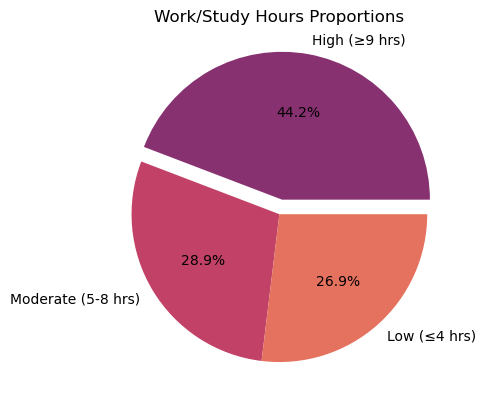

In [151]:
# Pie-chart visualization of Work/Study Hours Proportions

colors = sns.color_palette("flare_r", n_colors=len(depr_df['Work/Study Category'].unique()))

plt.pie(
    depr_df['Work/Study Category'].value_counts(),
    labels=depr_df['Work/Study Category'].unique().sort_values(ascending=False),
    autopct='%1.1f%%',
    explode=(0.1, 0, 0),
    colors=colors
)
plt.title("Work/Study Hours Proportions")

A significant number of students (**>12,000**) report studying for **9 or more hours daily**, indicating a high academic workload for a large portion of the population.

Text(0.5, 1.0, 'Categorical Distribution of Dietary Habits')

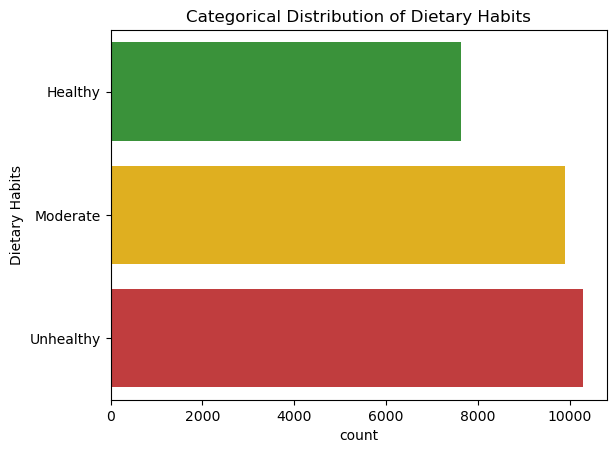

In [ ]:
# Categorical Distribution of Dietary Habits

palette = {
    "Healthy": "#2ca02c",   # green
    "Moderate": "#ffbf00",  # yellow
    "Unhealthy": "#d62728"  # red
}

sns.countplot(data=depr_df, y='Dietary Habits',palette=palette, hue='Dietary Habits', legend=False)
plt.title("Categorical Distribution of Dietary Habits")

Over **10000+** students are following a `Unhealthy` dietary routine, making it the most common among them.

#### **Summary**

The univariate analysis shows that:
- Students generally fall in typical academic age and CGPA ranges.
- Sleep and diet patterns highlight possible lifestyle concerns (low sleep, unhealthy eating).
- A significant proportion report suicidal thoughts, which may require deeper analysis in relation to other variables.

### Bivariate Analysis

### Multivariate Analysis

### **Data Pre-Processing**

### **Prediction**

### **Conclusion**